In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('datasets/vaccination_all_tweets.csv')

In [10]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


# data Preprocessing

## verified Account or not

In [4]:
df['user_verified']=df['user_verified'].apply(lambda x:'verified' if x==True else 'not_verified')

## Account Age

In [5]:
from datetime import date
df['today']=date.today()
df['user_created']=pd.to_datetime(df['user_created']).dt.year
df['today']=pd.to_datetime(df['today'])
df['today']=df['today'].dt.year
df['acc_age']= df['today']-df['user_created']

## Days Of December

In [6]:
print(max(df['date']))
print(min(df['date']))

2021-04-21 08:35:41
2020-12-12 11:55:28


In [7]:
df['date']=pd.to_datetime(df['date'])

In [8]:
L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']
df = df.join(pd.concat((getattr(df['date'].dt, i).rename(i) for i in L), axis=1))

## Total Engagement

In [9]:
df['total_engagement']=df['retweets']+df['favorites']

## Tweets length
### The tweet length can be no longer than 280 characters so let's check tweets length

In [10]:
df['text'].values[:2]

array(['Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF',
       "While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm"],
      dtype=object)

In [10]:
df['tweet_lenght']=df['text'].apply(lambda x:len(x))
df['tweet_lenght'].describe()

count    8082.000000
mean      129.276788
std        20.119504
min        27.000000
25%       129.000000
50%       139.000000
75%       140.000000
max       151.000000
Name: tweet_lenght, dtype: float64

# Tweet length class
### short < mean < long

In [11]:
df['tweet_length']=df['text'].apply(lambda x:'short' if len(x)<=130 else 'long')

In [13]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet', 'today', 'acc_age', 'year', 'month', 'day', 'dayofweek',
       'dayofyear', 'weekofyear', 'quarter', 'total_engagement',
       'tweet_lenght', 'tweet_length'],
      dtype='object')

In [14]:
df['user_location'].value_counts()

London, England                   124
Malaysia                          115
India                              94
London                             83
Canada                             79
                                 ... 
Ribeirão Preto, Brasil              1
Kennington, England                 1
Mishawaka, IN; www.rad-inc.com      1
Hell on Earth                       1
Between the future + the past       1
Name: user_location, Length: 2380, dtype: int64

# Fix Country location

In [12]:
loc_df = df['user_location'].str.split(',',expand=True)
loc_df=loc_df.rename(columns={0:'first_loc',1:'second_loc'})

### fixing states with country shortcuts

In [13]:
# Remove Spaces 
loc_df['second_loc'] = loc_df['second_loc'].str.strip()
# Rename States 
state_fix = {'Ontario': 'Canada','United Arab Emirates': 'UAE','TX': 'USA','NY': 'USA'
                  ,'FL': 'USA','England': 'UK','Watford': 'UK','GA': 'USA','IL': 'USA'
                  ,'Alberta': 'Canada','WA': 'USA','NC': 'USA','British Columbia': 'Canada','MA': 'USA','ON':'Canada'
            ,'OH':'USA','MO':'USA','AZ':'USA','NJ':'USA','CA':'USA','DC':'USA','AB':'USA','PA':'USA','SC':'USA'
            ,'VA':'USA','TN':'USA','New York':'USA','Dubai':'UAE','CO':'USA'}
loc_df = loc_df.replace({"second_loc": state_fix}) 
loc_df['second_loc'].value_counts()[:20]

USA                863
UK                 540
Canada             186
India              178
Ireland             91
UAE                 77
United Kingdom      75
Germany             61
Belgium             26
France              24
South Africa        23
Scotland            22
Pakistan            19
London              17
Qatar               17
Deutschland         16
Malaysia            16
MI                  16
New South Wales     16
Australia           15
Name: second_loc, dtype: int64

## hashtags count

In [14]:
df['Hash'] = df['text'].apply(lambda word:word.count('#'))

## Mentions Count

In [15]:
df['Men'] = df['text'].apply(lambda word:word.count('@'))

In [16]:
#('https://t.co/) this part in tweets refers to photos,videos
df['med'] = df['text'].apply(lambda word:word.count('https://t.co/'))
df['med'] = df['med'].apply(lambda x:'No Media' if x==0 else 'Media')

In [20]:
df['user_followers'].value_counts()

2        52
1        44
106      41
0        38
6        36
         ..
36640     1
5927      1
1833      1
4937      1
2033      1
Name: user_followers, Length: 2991, dtype: int64

In [17]:
df['acc_class'] = df['user_followers'].apply(lambda x:'weak'if x<=100 else ('norm' if 1000>=x>100 else 
                                                                       ('strong' if 10000>=x>1000
                                                                        else 'influencer')))
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,dayofyear,weekofyear,quarter,total_engagement,tweet_lenght,tweet_length,Hash,Men,med,acc_class
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009,405,1692,3247,not_verified,2020-12-20 06:06:44,...,355,51,4,0,97,short,1,0,Media,norm
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009,834,666,178,not_verified,2020-12-13 16:27:13,...,348,50,4,2,140,long,0,0,Media,norm
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020,10,88,155,not_verified,2020-12-12 20:33:45,...,347,50,4,0,140,long,6,0,Media,weak
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008,49165,3933,21853,verified,2020-12-12 20:23:59,...,347,50,4,2575,140,long,0,0,Media,influencer
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020,152,580,1473,not_verified,2020-12-12 20:17:19,...,347,50,4,0,135,long,2,2,Media,norm


# Transform Data Frame

In [22]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet', 'today', 'acc_age', 'year', 'month', 'day', 'dayofweek',
       'dayofyear', 'weekofyear', 'quarter', 'total_engagement',
       'tweet_lenght', 'tweet_length', 'Hash', 'Men', 'med', 'acc_class'],
      dtype='object')

In [18]:
df=df[['user_name','text','date', 'acc_age','user_verified','retweets','favorites','total_engagement', 'day', 'tweet_length',
       'Hash', 'Men', 'med', 'acc_class','month']]
df_copy=df.copy()
df.head()

,user_name,text,date,acc_age,user_verified,retweets,favorites,total_engagement,day,tweet_length,Hash,Men,med,acc_class,month
0,Rachel Roh,Same folks said daikon paste could treat a cyt...,2020-12-20 06:06:44,12,not_verified,0,0,0,20,short,1,0,Media,norm,12
1,Albert Fong,While the world has been on the wrong side of ...,2020-12-13 16:27:13,12,not_verified,1,1,2,13,long,0,0,Media,norm,12
2,eli🇱🇹🇪🇺👌,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,2020-12-12 20:33:45,1,not_verified,0,0,0,12,long,6,0,Media,weak,12
3,Charles Adler,"Facts are immutable, Senator, even when you're...",2020-12-12 20:23:59,13,verified,446,2129,2575,12,long,0,0,Media,influencer,12
4,Citizen News Channel,Explain to me again why we need a vaccine @Bor...,2020-12-12 20:17:19,1,not_verified,0,0,0,12,long,2,2,Media,norm,12


# Data Visualization

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

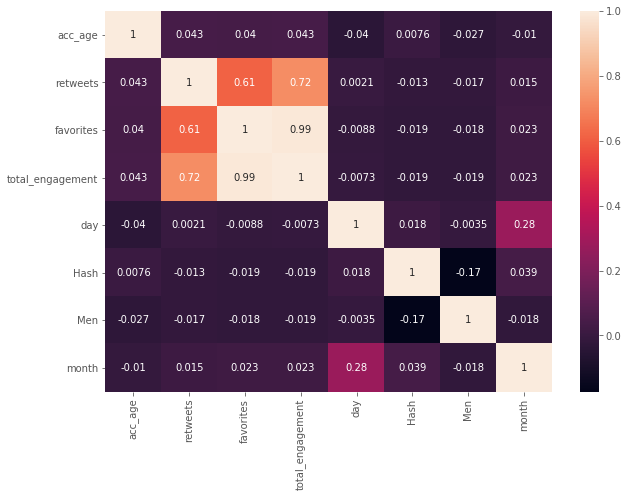

In [25]:
corr=df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True)

## length class

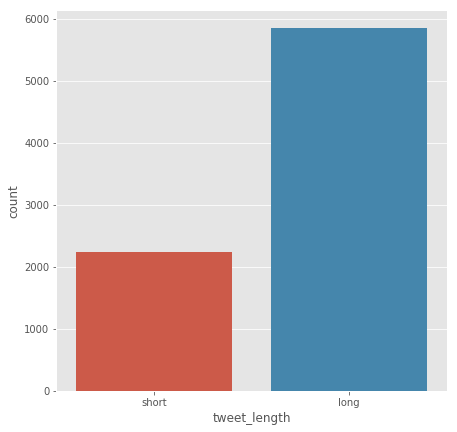

In [26]:
plt.figure(figsize=(7,7))
sns.countplot(x='tweet_length',data=df)

## Tweet Length / hashtags

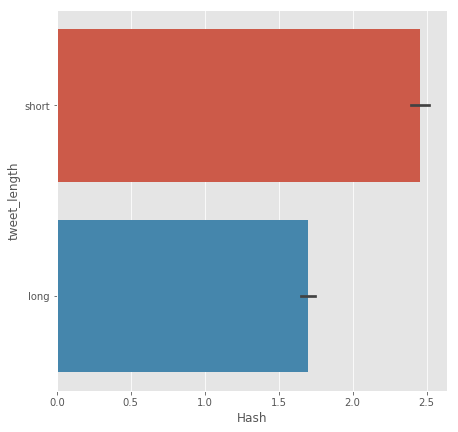

In [27]:
plt.figure(figsize=(7,7))
sns.barplot(x=df['Hash'],y=df['tweet_length'],data=df)

## tweet length / Mentions

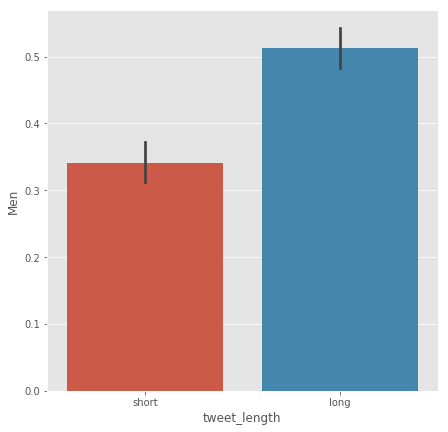

In [28]:
plt.figure(figsize=(7,7))
sns.barplot(x=df['tweet_length'],y=df['Men'],data=df)

## Verified Accounts

In [29]:
df['user_verified'].value_counts()

not_verified    7323
verified         759
Name: user_verified, dtype: int64

(-1.1505029161234455,
 1.0574951215706034,
 -1.2009314800414903,
 1.1048062907740432)

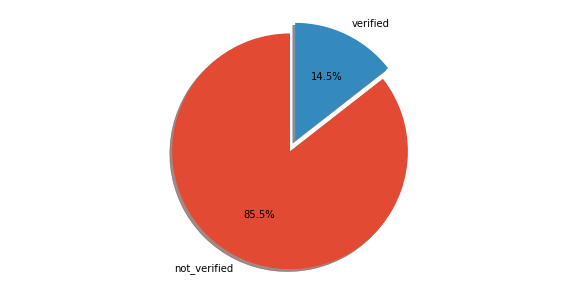

In [30]:
labels = 'not_verified', 'verified'
sizes = [1888, 319]
explode = (0.1, 0)  
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')

### only 14.5% tweets are verified

## Account Class

In [31]:
df.columns

Index(['user_name', 'text', 'date', 'acc_age', 'user_verified', 'retweets',
       'favorites', 'total_engagement', 'day', 'tweet_length', 'Hash', 'Men',
       'med', 'acc_class', 'month'],
      dtype='object')

In [20]:
class_eng = df.groupby('acc_class',as_index=False).agg({'total_engagement':'sum',})

In [33]:
fig = px.bar(class_eng,
             x='acc_class',
             y='total_engagement',
             color='total_engagement',
             color_continuous_scale='Rainbow',
             title='Engagement By Account_Class')
fig.show()

## No media

In [21]:
Media = len(df[df['med']=='Media'])
No_Media = len(df[df['med']=='No Media'])
Platform = ['Media','No Media']
Count = [Media,No_Media]
#====
fig = px.pie(names = Platform,
             values = Count,
             title='Media/No Media',
            color_discrete_sequence = px.colors.sequential.Rainbow)
fig.update_traces(textposition='inside', textinfo='percent+label')

## Engagement with respect to date

In [22]:
line = df.groupby('date',as_index=False).agg({'total_engagement':'sum'})
fig = go.Figure()
fig.add_trace(go.Scatter(x=line.date, y=line.total_engagement,
                    mode='lines+markers'))

In [36]:
## days of december

In [23]:
december=df.loc[df['month']==12]
day_december = december.groupby('day',as_index=False).agg({'total_engagement':'sum'})

fig = px.scatter(day_december,
                 x='day',
                 y='total_engagement',
                 color_continuous_scale='Rainbow',
                 color='total_engagement',
                 size='total_engagement',
                 title='Most engaged days in December')
fig.show()

## Most of the engagements were from 12 to 14 December.

In [38]:
## Accounts per Engagements

In [24]:
ret = df.groupby('user_name',as_index=False).agg({'retweets':'sum'}).sort_values('retweets',ascending=False).head(10)
like = df.groupby('user_name',as_index=False).agg({'favorites':'sum'}).sort_values('favorites',ascending=False).head(10)
tot_eng = df.groupby('user_name',as_index=False).agg({'total_engagement':'sum'}).sort_values('total_engagement',ascending=False).head(10)


fig = px.bar(tot_eng,
             x='user_name',
             y='total_engagement',
             color='total_engagement',
             color_continuous_scale='Viridis',
             title='Accounts per Engagements')
fig.show()

## Account age per Engagement

In [40]:
age=df.groupby('acc_age',as_index=False).agg({'total_engagement':'sum'})
px.line(age,x='acc_age',y='total_engagement',labels={'x':'age','y':'engagement'})

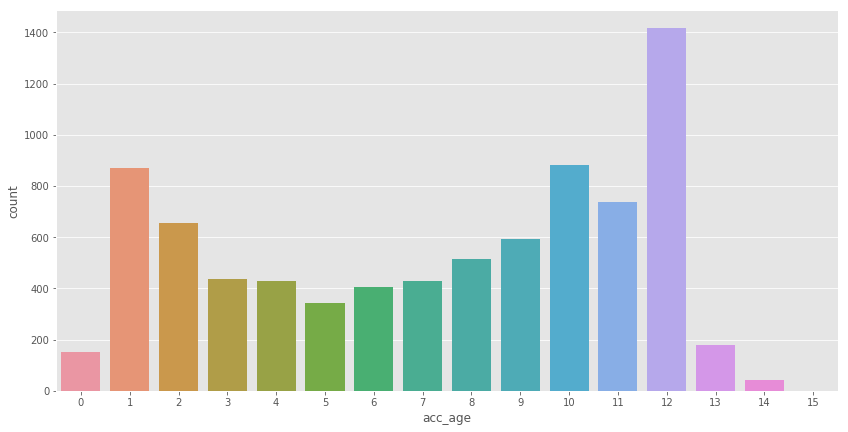

In [41]:
import seaborn as sns 
plt.figure(figsize=(14,7))
sns.countplot(x='acc_age',data=df_copy)

In [42]:
df3=pd.DataFrame(loc_df['second_loc'].value_counts()[:20]).reset_index()
df3

,index,second_loc
0,USA,863
1,UK,540
2,Canada,186
3,India,178
4,Ireland,91
5,UAE,77
6,United Kingdom,75
7,Germany,61
8,Belgium,26
9,France,24


## location tweet

In [44]:
fig = px.choropleth(df3, locations = df3['index'],
                    color = df3['second_loc'],locationmode='country names',hover_name = df3['second_loc'], 
                    color_continuous_scale = px.colors.sequential.Inferno)
fig.update_layout(title='Sales tracking')
fig.show()

# Tweet NLP Analysis

## get keyword out of tweets

In [20]:
tweets = df['text']

In [21]:
all_sentences = []

for word in tweets:
    all_sentences.append(word)

all_sentences

lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)

In [22]:
import re

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

## Getting words Root

In [23]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))

## Top Mention Keywords

In [1]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [24]:
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

In [25]:
df = pd.DataFrame(stem2)
df = df[0].value_counts()

In [17]:
from wordcloud import WordCloud

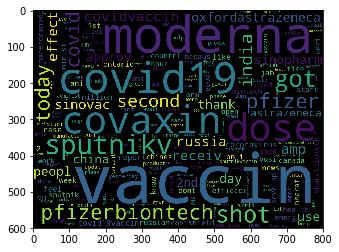

In [26]:
cloud = WordCloud(width=800, height=600).generate_from_frequencies(df)
plt.imshow(cloud)
cloud.to_file('Cloud1.png')

In [75]:
df = df[:20,]
px.bar(df, x=df.values,y= df.index, color=df.index, height=500)

## Top Mention Organizations

In [76]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

ModuleNotFoundError: No module named 'en_core_web_sm'

In [ ]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [59]:
nlp = spacy.load('en_core_web_sm') 
nlp.max_length = 2000000000000

In [60]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

In [61]:
df = df7[:20,]
plt.figure(figsize=(10,5))
px.bar(df, x=df.values,y= df.index, color=df.index, height=500)

<Figure size 720x360 with 0 Axes>

## Top Mention people

In [33]:
nlp = spacy.load('en_core_web_sm') 
nlp.max_length = 2000000000000

str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [63]:

plt.figure(figsize=(10,5))

df = df11[:20,]
plt.figure(figsize=(10,5))
px.bar(df, x=df.values,y= df.index, color=df.index, height=500)

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

# sentiments Analysis

## Removing all characters from text

In [36]:
features=tweets.values
features

array(['Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF',
       "While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",
       '#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P',
       ...,
       'Second #PfizerBioNTech vaccine shot done! Thanks #HongKong! 💉\n#HKTwitterGetsVaxxed #HKTwitterFullyVaxxed https://t.co/S5FGq93vlv',
       'Second #PfizerBioNTech vaccine is officially in! 💉\nThank you #HongKong &amp; all #HK healthcare workers and volunteers!… https://t.co/FiNjFzgvja',
       '@mid_day #DGCI why not allow other proven Vaccines like #PfizerBioNTech #Moderna #JnJ'],
      dtype=object)

In [37]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the Http: urls
    processed_feature = re.sub('(https?://\S+)', '', str(features[sentence]))
    
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', processed_feature)

    # Remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)


In [38]:
features[:5]

array(['Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF',
       "While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",
       '#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P',
       "Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",
       'Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq'],
      dtype=object)

In [39]:
processed_features[:5]

['same folks said daikon paste could treat cytokine storm pfizerbiontech ',
 'while the world has been on the wrong side of history this year hopefully the biggest vaccination effort we ve ev ',
 ' coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine is created to last 2 4 years ',
 'facts are immutable senator even when you re not ethically sturdy enough to acknowledge them 1 you were born ',
 'explain to me again why we need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech ']

## Adding subjectivity & polarity

In [40]:
df3=pd.DataFrame()
df3['Tweets']=processed_features

In [45]:
len(processed_features)

8082

In [41]:
from textblob import TextBlob
from wordcloud import WordCloud
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df3['Subjectivity'] = df3['Tweets'].apply(getSubjectivity)
df3['Polarity'] = df3['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df3

,Tweets,Subjectivity,Polarity
0,same folks said daikon paste could treat cytok...,0.125000,0.000
1,while the world has been on the wrong side of ...,0.900000,-0.500
2,coronavirus sputnikv astrazeneca pfizerbionte...,0.033333,0.000
3,facts are immutable senator even when you re n...,0.550000,-0.050
4,explain to me again why we need vaccine borisj...,0.000000,0.000
...,...,...,...
8077,off for my second vaccine then work cured pfiz...,0.000000,0.000
8078,when appears to be million dollar question th...,0.000000,0.000
8079,second pfizerbiontech vaccine shot done thanks...,0.100000,0.100
8080,second pfizerbiontech vaccine is officially in...,0.000000,0.000


# Create Sentiment  Analysis

In [42]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df3['Analysis'] = df3['Polarity'].apply(getAnalysis)
df3

,Tweets,Subjectivity,Polarity,Analysis
0,same folks said daikon paste could treat cytok...,0.125000,0.000,Neutral
1,while the world has been on the wrong side of ...,0.900000,-0.500,Negative
2,coronavirus sputnikv astrazeneca pfizerbionte...,0.033333,0.000,Neutral
3,facts are immutable senator even when you re n...,0.550000,-0.050,Negative
4,explain to me again why we need vaccine borisj...,0.000000,0.000,Neutral
...,...,...,...,...
8077,off for my second vaccine then work cured pfiz...,0.000000,0.000,Neutral
8078,when appears to be million dollar question th...,0.000000,0.000,Neutral
8079,second pfizerbiontech vaccine shot done thanks...,0.100000,0.100,Positive
8080,second pfizerbiontech vaccine is officially in...,0.000000,0.000,Neutral


In [81]:
Neutral = len(df3[df3['Analysis']=='Neutral'])
Negative = len(df3[df3['Analysis']=='Negative'])
Positive = len(df3[df3['Analysis']=='Positive'])
labels = ['Negative','Positive','Neutral']
values = [Negative,Positive,Neutral]

import plotly.graph_objects as go
colors = ['darkred','green', 'darkblue' ]

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,textposition='inside',
                  marker=dict(colors=colors, line=dict(color='grey', width=1)))
fig.show()

<AxesSubplot:xlabel='acc_class', ylabel='count'>

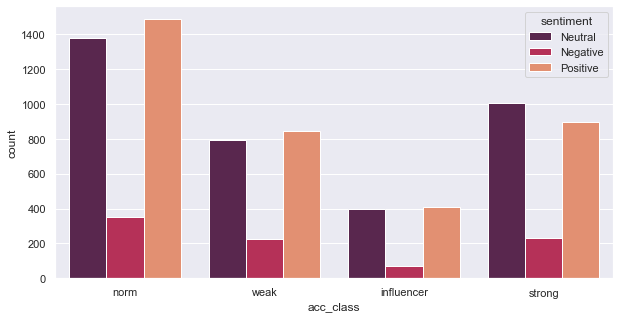

In [82]:
df_copy['sentiment'] = df3['Analysis']

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.countplot(x=df_copy['acc_class'],data=df_copy,hue=df_copy['sentiment'],palette="rocket")

In [83]:
sen_eng = df_copy.groupby('sentiment',as_index=False).agg({'total_engagement':'sum'})
fig = px.bar(sen_eng, x='total_engagement', y='sentiment',
             hover_data=['total_engagement'], color='total_engagement', height=400)
fig.show()

### Close to 40k of the tweets are from positive sentiments followed by neutral and negative sentiment.

## Conclusion
- Most of the tweets are long
- 85% of the accounts aren't verified
- Short tweets have more hashtags and less mentions
- Influencers account gets more engagement
- Pfizer Bio Tech has the highest count with respect to organization followed by COVID 19
- Moderna has the highest count with respect to people
- 94% of tweets have media
- Day 12 of December most engaged day
- People using twitter for almost 12 years now have the highest engagements of 20.752k
- Anita Anand get the Highest engagements
- One year and three years are the most common account age
- The USA the most tweeted Country followed by Canada
- Only 10% of tweets are negative
- Positive and neutral tweets get high engagements

In [43]:
import wordcloud